<a href="https://colab.research.google.com/github/ivelin/canswim/blob/main/canswim_sandbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is an experimental attempt to implement growth stock indicators in support of CANSLIM style investors and traders.

Jupyter notebook housekeeping

In [ ]:
pip install -r requirements.txt


In [ ]:
# fix python path if working locally
#from utils import fix_pythonpath_if_working_locally
#
#fix_pythonpath_if_working_locally()
#%matplotlib inline



In [ ]:

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [15, 7]

Check whether GPU is available

In [146]:
import torch
torch.cuda.is_available()

False

Load data from prepared local csv files

In [3]:
from darts import TimeSeries
import pandas as pd


Load stock symbols

In [8]:
stocks_file = 'data/ibdgrowth_hist.csv.bz2'

In [9]:
# load into a dataframe with valid market calendar days
stocks_df = pd.read_csv(stocks_file, header=[0, 1], index_col=0)
stocks_df



RYZB                                              \
                          Open       High        Low      Close  Adj Close   
Date                                                                         
1962-01-02 00:00:00        NaN        NaN        NaN        NaN        NaN   
1962-01-03 00:00:00        NaN        NaN        NaN        NaN        NaN   
1962-01-04 00:00:00        NaN        NaN        NaN        NaN        NaN   
1962-01-05 00:00:00        NaN        NaN        NaN        NaN        NaN   
1962-01-08 00:00:00        NaN        NaN        NaN        NaN        NaN   
...                        ...        ...        ...        ...        ...   
2024-01-02 00:00:00  62.000000  62.099998  61.900002  61.950001  61.950001   
2024-01-03 00:00:00  61.990002  62.000000  61.759998  61.810001  61.810001   
2024-01-04 00:00:00  62.020000  62.020000  61.750000  61.840000  61.840000   
2024-01-05 00:00:00  61.849998  61.985001  61.770000  61.980000  61.980000   
2024-01-08 00:00:00  61.950001  61.990002  61.889999  61.912498  61.912498   

                                     PATH                                   \
                        Volume       Open       High        Low      Close   
Date                                                                         
1962-01-02 00:00:00        NaN        NaN        NaN        NaN        NaN   
1962-01-03 00:00:00        NaN        NaN        NaN        NaN        NaN   
1962-01-04 00:00:00        NaN        NaN        NaN        NaN        NaN   
1962-01-05 00:00:00        NaN        NaN        NaN        NaN        NaN   
1962-01-08 00:00:00        NaN        NaN        NaN        NaN        NaN   
...                        ...        ...        ...        ...        ...   
2024-01-02 00:00:00  1582500.0  24.520000  24.613001  23.629999  23.799999   
2024-01-03 00:00:00   949400.0  23.260000  23.440001  22.510000  22.570000   
2024-01-04 00:00:00   780400.0  22.500000  22.760000  22.290001  22.570000   
2024-01-05 00:00:00   458700.0  22.450001  22.895000  22.260000  22.610001   
2024-01-08 00:00:00   284138.0        NaN        NaN        NaN        NaN   

                     ...        TJX                                   \
                     ...        Low      Close  Adj Close     Volume   
Date                 ...                                               
1962-01-02 00:00:00  ...        NaN        NaN        NaN        NaN   
1962-01-03 00:00:00  ...        NaN        NaN        NaN        NaN   
1962-01-04 00:00:00  ...        NaN        NaN        NaN        NaN   
1962-01-05 00:00:00  ...        NaN        NaN        NaN        NaN   
1962-01-08 00:00:00  ...        NaN        NaN        NaN        NaN   
...                  ...        ...        ...        ...        ...   
2024-01-02 00:00:00  ...  92.830002  93.279999  93.279999  5273500.0   
2024-01-03 00:00:00  ...  91.660004  91.699997  91.699997  5337800.0   
2024-01-04 00:00:00  ...  91.309998  92.779999  92.779999  5328000.0   
2024-01-05 00:00:00  ...  91.559998  91.709999  91.709999  4533700.0   
2024-01-08 00:00:00  ...  91.644997  91.978996  91.978996  1635651.0   

                          BLKB                                              \
                          Open       High        Low      Close  Adj Close   
Date                                                                         
1962-01-02 00:00:00        NaN        NaN        NaN        NaN        NaN   
1962-01-03 00:00:00        NaN        NaN        NaN        NaN        NaN   
1962-01-04 00:00:00        NaN        NaN        NaN        NaN        NaN   
1962-01-05 00:00:00        NaN        NaN        NaN        NaN        NaN   
1962-01-08 00:00:00        NaN        NaN        NaN        NaN        NaN   
...                        ...        ...        ...        ...        ...   
2024-01-02 00:00:00  85.910004  86.360001  84.779999  85.570000  85.570000   
2024-01-03 00:00:00  85.330002  85.570000  83.86000

In [25]:
ticker_dict = {ticker:stocks_df[ticker].dropna() for ticker in stocks_df.columns.levels[0][:2]}
for t,df in ticker_dict.items():
    print(f'ticker: {t}')
    print(f'ticker historic data: {df}')
    df.index = pd.to_datetime(df.index)
    ticker_dict[t] = df



ticker: AAON
ticker historic data:                           Open       High        Low      Close  Adj Close  \
Date                                                                         
1992-12-16 00:00:00   0.066509   0.066509   0.066509   0.066509   0.050325   
1992-12-17 00:00:00   0.079810   0.086461   0.066509   0.079810   0.060390   
1992-12-18 00:00:00   0.079810   0.079810   0.079810   0.079810   0.060390   
1992-12-21 00:00:00   0.066509   0.066509   0.059858   0.066509   0.050325   
1992-12-22 00:00:00   0.066509   0.079810   0.066509   0.079810   0.060390   
...                        ...        ...        ...        ...        ...   
2024-01-02 00:00:00  73.040001  74.160004  72.510002  73.900002  73.900002   
2024-01-03 00:00:00  73.190002  73.629997  72.160004  73.110001  73.110001   
2024-01-04 00:00:00  72.889999  74.199997  72.500000  73.739998  73.739998   
2024-01-05 00:00:00  73.070000  73.959999  71.730003  72.449997  72.449997   
2024-01-08 00:00:00  72.36000

In [26]:
ticker_dict

{'AAON':                  Open       High        Low      Close  Adj Close    Volume
 Date                                                                       
 1992-12-16   0.066509   0.066509   0.066509   0.066509   0.050325    3759.0
 1992-12-17   0.079810   0.086461   0.066509   0.079810   0.060390  246208.0
 1992-12-18   0.079810   0.079810   0.079810   0.079810   0.060390   22553.0
 1992-12-21   0.066509   0.066509   0.059858   0.066509   0.050325   50745.0
 1992-12-22   0.066509   0.079810   0.066509   0.079810   0.060390   93973.0
 ...               ...        ...        ...        ...        ...       ...
 2024-01-02  73.040001  74.160004  72.510002  73.900002  73.900002  375700.0
 2024-01-03  73.190002  73.629997  72.160004  73.110001  73.110001  456000.0
 2024-01-04  72.889999  74.199997  72.500000  73.739998  73.739998  394600.0
 2024-01-05  73.070000  73.959999  71.730003  72.449997  72.449997  349600.0
 2024-01-08  72.360001  73.400002  72.360001  73.110001  73.110001  

In [27]:
type(ticker_dict['AAON'].index)

pandas.core.indexes.datetimes.DatetimeIndex

In [ ]:
# type(raw_df.index)

In [ ]:
# check for missing values
# raw_df.shape[0] - raw_df.dropna().shape[0]

In [ ]:
# raw_df

In [74]:

# series = TimeSeries.from_csv('data/market_data.csv', time_col='Date')

ticker_series = {ticker: TimeSeries.from_dataframe(ticker_dict[ticker], freq='B') for ticker in ticker_dict.keys()}
ticker_series

# series = TimeSeries.from_dataframe(raw_df, freq='B')

# raw_df = pd.read_csv(data_file_name, parse_dates=['Date'], index_col=['Date'])

# series = TimeSeries.from_csv(data_file_name, time_col='Date', freq='B')


{'AAON': <TimeSeries (DataArray) (Date: 8104, component: 6, sample: 1)>
 array([[[6.65090010e-02],
         [6.65090010e-02],
         [6.65090010e-02],
         [6.65090010e-02],
         [5.03252819e-02],
         [3.75900000e+03]],
 
        [[7.98100010e-02],
         [8.64610001e-02],
         [6.65090010e-02],
         [7.98100010e-02],
         [6.03897348e-02],
         [2.46208000e+05]],
 
        [[7.98100010e-02],
         [7.98100010e-02],
         [7.98100010e-02],
         [7.98100010e-02],
         [6.03897348e-02],
         [2.25530000e+04]],
 ...
        [[7.28899994e+01],
         [7.41999969e+01],
         [7.25000000e+01],
         [7.37399979e+01],
         [7.37399979e+01],
         [3.94600000e+05]],
 
        [[7.30699997e+01],
         [7.39599991e+01],
         [7.17300034e+01],
         [7.24499969e+01],
         [7.24499969e+01],
         [3.49600000e+05]],
 
        [[7.23600006e+01],
         [7.34000015e+01],
         [7.23600006e+01],
         [7.3110000

Prepare multile series - one per stock ticker

In [75]:
from darts.dataprocessing.transformers import MissingValuesFiller
filler = MissingValuesFiller()

for t, series in ticker_series.items():
    gaps = series.gaps(mode='any')
    print(f'ticker: {t} gaps: \n {gaps}')
    series_filled = filler.transform(series)
    # check for any data gaps
    gaps_filled = series_filled.gaps(mode='any')
    print(f'ticker: {t} gaps after filler: \n {gaps_filled}')
    ticker_series[t] = series_filled



ticker: AAON gaps: 
      gap_start    gap_end  gap_size
0   1992-12-25 1992-12-25         1
1   1993-01-01 1993-01-01         1
2   1993-02-15 1993-02-15         1
3   1993-04-09 1993-04-09         1
4   1993-05-31 1993-05-31         1
..         ...        ...       ...
273 2023-07-04 2023-07-04         1
274 2023-09-04 2023-09-04         1
275 2023-11-23 2023-11-23         1
276 2023-12-25 2023-12-25         1
277 2024-01-01 2024-01-01         1

[278 rows x 3 columns]
ticker: AAON gaps after filler: 
 Empty DataFrame
Columns: [gap_start, gap_end]
Index: []
ticker: ABBNY gaps: 
      gap_start    gap_end  gap_size
0   2001-04-13 2001-04-13         1
1   2001-05-28 2001-05-28         1
2   2001-07-04 2001-07-04         1
3   2001-09-03 2001-09-03         1
4   2001-09-11 2001-09-14         4
..         ...        ...       ...
203 2023-07-04 2023-07-04         1
204 2023-09-04 2023-09-04         1
205 2023-11-23 2023-11-23         1
206 2023-12-25 2023-12-25         1
207 2024-01-01 

In [78]:
# pick the earlies date after which data is available for all covariate series
train_date_start = pd.Timestamp('1990-01-02')

for t, series in ticker_series.items():
    ticker_series[t] = series.slice(train_date_start, series.end_time())
    print(f'ticker: {t} , {ticker_series[t]}')


ticker: AAON , <TimeSeries (DataArray) (Date: 8104, component: 6, sample: 1)>
array([[[6.65090010e-02],
        [6.65090010e-02],
        [6.65090010e-02],
        [6.65090010e-02],
        [5.03252819e-02],
        [3.75900000e+03]],

       [[7.98100010e-02],
        [8.64610001e-02],
        [6.65090010e-02],
        [7.98100010e-02],
        [6.03897348e-02],
        [2.46208000e+05]],

       [[7.98100010e-02],
        [7.98100010e-02],
        [7.98100010e-02],
        [7.98100010e-02],
        [6.03897348e-02],
        [2.25530000e+04]],
...
       [[7.28899994e+01],
        [7.41999969e+01],
        [7.25000000e+01],
        [7.37399979e+01],
        [7.37399979e+01],
        [3.94600000e+05]],

       [[7.30699997e+01],
        [7.39599991e+01],
        [7.17300034e+01],
        [7.24499969e+01],
        [7.24499969e+01],
        [3.49600000e+05]],

       [[7.23600006e+01],
        [7.34000015e+01],
        [7.23600006e+01],
        [7.31100006e+01],
        [7.31100006e+01],

In [79]:
# add holidays as future covariates
for t, series in ticker_series.items():
    series_with_holidays = series.add_holidays(country_code='US')
    ticker_series[t] = series_with_holidays
    print(f'ticker: {t} , {ticker_series[t]}')


ticker: AAON , <TimeSeries (DataArray) (Date: 8104, component: 7, sample: 1)>
array([[[6.65090010e-02],
        [6.65090010e-02],
        [6.65090010e-02],
        ...,
        [5.03252819e-02],
        [3.75900000e+03],
        [0.00000000e+00]],

       [[7.98100010e-02],
        [8.64610001e-02],
        [6.65090010e-02],
        ...,
        [6.03897348e-02],
        [2.46208000e+05],
        [0.00000000e+00]],

       [[7.98100010e-02],
        [7.98100010e-02],
        [7.98100010e-02],
        ...,
...
        ...,
        [7.37399979e+01],
        [3.94600000e+05],
        [0.00000000e+00]],

       [[7.30699997e+01],
        [7.39599991e+01],
        [7.17300034e+01],
        ...,
        [7.24499969e+01],
        [3.49600000e+05],
        [0.00000000e+00]],

       [[7.23600006e+01],
        [7.34000015e+01],
        [7.23600006e+01],
        ...,
        [7.31100006e+01],
        [5.76590000e+04],
        [0.00000000e+00]]])
Coordinates:
  * Date       (Date) datetime64[ns] 

In [80]:
ticker_series

{'AAON': <TimeSeries (DataArray) (Date: 8104, component: 7, sample: 1)>
 array([[[6.65090010e-02],
         [6.65090010e-02],
         [6.65090010e-02],
         ...,
         [5.03252819e-02],
         [3.75900000e+03],
         [0.00000000e+00]],
 
        [[7.98100010e-02],
         [8.64610001e-02],
         [6.65090010e-02],
         ...,
         [6.03897348e-02],
         [2.46208000e+05],
         [0.00000000e+00]],
 
        [[7.98100010e-02],
         [7.98100010e-02],
         [7.98100010e-02],
         ...,
 ...
         ...,
         [7.37399979e+01],
         [3.94600000e+05],
         [0.00000000e+00]],
 
        [[7.30699997e+01],
         [7.39599991e+01],
         [7.17300034e+01],
         ...,
         [7.24499969e+01],
         [3.49600000e+05],
         [0.00000000e+00]],
 
        [[7.23600006e+01],
         [7.34000015e+01],
         [7.23600006e+01],
         ...,
         [7.31100006e+01],
         [5.76590000e+04],
         [0.00000000e+00]]])
 Coordinates:
 

In [85]:
from darts.dataprocessing.transformers import Scaler

# scale series values within [0,1] range to avoid gradient explosion
for t, series in ticker_series.items():
    ser_scaler = Scaler(verbose=True, n_jobs=-1)
    series_scaled = ser_scaler.fit_transform(series=series)
    # print(f'ticker: {t} , {series_scaled}')
    ticker_series[t] = series_scaled
    print(f'ticker: {t} , {ticker_series[t]}')


Fitting (Scaler):   0%|          | 0/1 [00:00<?, ?it/s]

Transform (Scaler):   0%|          | 0/1 [00:00<?, ?it/s]

ticker: AAON , <TimeSeries (DataArray) (Date: 8104, component: 7, sample: 1)>
array([[[0.00000000e+00],
        [0.00000000e+00],
        [9.00973536e-05],
        ...,
        [0.00000000e+00],
        [1.23086877e-04],
        [0.00000000e+00]],

       [[1.78840597e-04],
        [2.65412707e-04],
        [9.00973536e-05],
        ...,
        [1.35676686e-04],
        [8.06197763e-03],
        [0.00000000e+00]],

       [[1.78840597e-04],
        [1.76937378e-04],
        [2.70278536e-04],
        ...,
...
        ...,
        [9.93394343e-01],
        [1.29210114e-02],
        [0.00000000e+00]],

       [[9.81579422e-01],
        [9.82972737e-01],
        [9.70875239e-01],
        ...,
        [9.76004123e-01],
        [1.14475053e-02],
        [0.00000000e+00]],

       [[9.72033022e-01],
        [9.75523335e-01],
        [9.79409458e-01],
        ...,
        [9.84901488e-01],
        [1.88801976e-03],
        [0.00000000e+00]]])
Coordinates:
  * Date       (Date) datetime64[ns] 

Fitting (Scaler):   0%|          | 0/1 [00:00<?, ?it/s]

Transform (Scaler):   0%|          | 0/1 [00:00<?, ?it/s]

ticker: ABBNY , <TimeSeries (DataArray) (Date: 5937, component: 7, sample: 1)>
array([[[0.36639629],
        [0.36418187],
        [0.36408755],
        ...,
        [0.17013287],
        [0.00563525],
        [0.        ]],

       [[0.36407878],
        [0.37110546],
        [0.36684468],
        ...,
        [0.1752502 ],
        [0.00107687],
        [0.        ]],

       [[0.38377752],
        [0.38541427],
        [0.38541912],
        ...,
...
        ...,
        [0.96115084],
        [0.00993225],
        [0.        ]],

       [[0.94994207],
        [0.95407344],
        [0.95193871],
        ...,
        [0.9522384 ],
        [0.00654135],
        [0.        ]],

       [[0.95828507],
        [0.96399729],
        [0.96215469],
        ...,
        [0.96549286],
        [0.00392871],
        [0.        ]]])
Coordinates:
  * Date       (Date) datetime64[ns] 2001-04-06 2001-04-09 ... 2024-01-08
  * component  (component) object 'Open' 'High' 'Low' ... 'Volume' 'holidays'
Dime

In [117]:
# prepare target univariate price series per ticker
target_series = {t: ticker_series[t].univariate_component('Adj Close') for t in ticker_series.keys()}
target_series

{'AAON': <TimeSeries (DataArray) (Date: 8104, component: 1, sample: 1)>
 array([[[0.00000000e+00]],
 
        [[1.35676686e-04]],
 
        [[1.35676686e-04]],
 
        ...,
 
        [[9.93394343e-01]],
 
        [[9.76004123e-01]],
 
        [[9.84901488e-01]]])
 Coordinates:
   * Date       (Date) datetime64[ns] 1992-12-16 1992-12-17 ... 2024-01-08
   * component  (component) object 'Adj Close'
 Dimensions without coordinates: sample
 Attributes:
     static_covariates:  None
     hierarchy:          None,
 'ABBNY': <TimeSeries (DataArray) (Date: 5937, component: 1, sample: 1)>
 array([[[0.17013287]],
 
        [[0.1752502 ]],
 
        [[0.18056412]],
 
        ...,
 
        [[0.96115084]],
 
        [[0.9522384 ]],
 
        [[0.96549286]]])
 Coordinates:
   * Date       (Date) datetime64[ns] 2001-04-06 2001-04-09 ... 2024-01-08
   * component  (component) object 'Adj Close'
 Dimensions without coordinates: sample
 Attributes:
     static_covariates:  None
     hierarchy:       

Prepare Past Covariates

In [118]:
# start with target ticker's own adjacent data: Open, High, Low, Volume
# drop Close which is the target series
# drop holidays which will be added later to future covariates
past_covariates = {t: ticker_series[t].drop_columns(col_names=['Close', 'Adj Close', 'holidays']) for t in ticker_series.keys()}

past_covariates


{'AAON': <TimeSeries (DataArray) (Date: 8104, component: 4, sample: 1)>
 array([[[0.00000000e+00],
         [0.00000000e+00],
         [9.00973536e-05],
         [1.23086877e-04]],
 
        [[1.78840597e-04],
         [2.65412707e-04],
         [9.00973536e-05],
         [8.06197763e-03]],
 
        [[1.78840597e-04],
         [1.76937378e-04],
         [2.70278536e-04],
         [7.38488520e-04]],
 
        ...,
 
        [[9.79159201e-01],
         [9.86165323e-01],
         [9.81305952e-01],
         [1.29210114e-02]],
 
        [[9.81579422e-01],
         [9.82972737e-01],
         [9.70875239e-01],
         [1.14475053e-02]],
 
        [[9.72033022e-01],
         [9.75523335e-01],
         [9.79409458e-01],
         [1.88801976e-03]]])
 Coordinates:
   * Date       (Date) datetime64[ns] 1992-12-16 1992-12-17 ... 2024-01-08
   * component  (component) object 'Open' 'High' 'Low' 'Volume'
 Dimensions without coordinates: sample
 Attributes:
     static_covariates:  None
     hierarc

In [119]:
past_covariates.keys()

dict_keys(['AAON', 'ABBNY'])

AAON past covariates components: Index(['Open', 'High', 'Low', 'Volume'], dtype='object', name='component')
ABBNY past covariates components: Index(['Open', 'High', 'Low', 'Volume'], dtype='object', name='component')


Text(0, 0.5, 'Past Covariates')

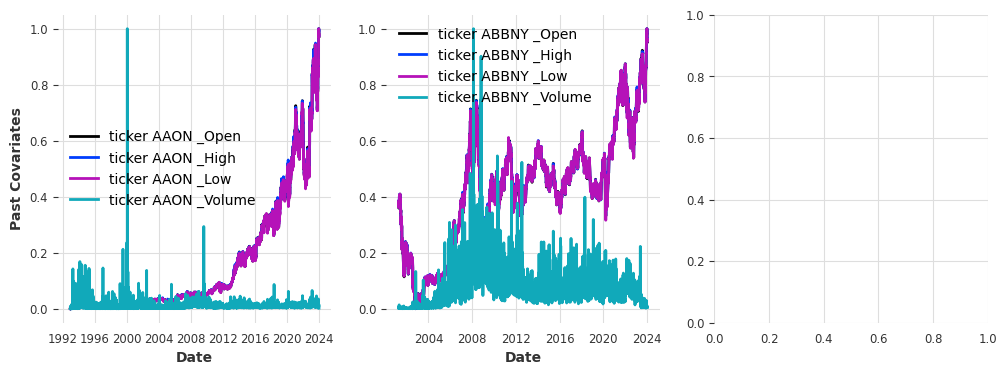

In [126]:
import matplotlib.pyplot as plt

# plot sample of past covariates
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i,t in enumerate(past_covariates.keys()):
    print(f'{t} past covariates components: {past_covariates[t].columns}')
    past_covariates[t].plot(label=f'ticker {t} ', ax=axes[i])

axes[0].set_ylabel('Past Covariates')


Stack broad market indicators to past covariates

In [127]:
broad_market_df = pd.read_csv('data/broad_market.csv.bz2', header=[0, 1], index_col=0)

# fix datetime index type issue
# https://stackoverflow.com/questions/48248239/pandas-how-to-convert-rangeindex-into-datetimeindex
broad_market_df.index = pd.to_datetime(broad_market_df.index)


broad_market_df

^VIX                                         ^TNX                \
             Open   High    Low  Close Adj Close Volume   Open   High    Low   
Date                                                                           
1927-12-30    NaN    NaN    NaN    NaN       NaN    NaN    NaN    NaN    NaN   
1928-01-03    NaN    NaN    NaN    NaN       NaN    NaN    NaN    NaN    NaN   
1928-01-04    NaN    NaN    NaN    NaN       NaN    NaN    NaN    NaN    NaN   
1928-01-05    NaN    NaN    NaN    NaN       NaN    NaN    NaN    NaN    NaN   
1928-01-06    NaN    NaN    NaN    NaN       NaN    NaN    NaN    NaN    NaN   
...           ...    ...    ...    ...       ...    ...    ...    ...    ...   
2024-01-02  13.22  14.23  13.10  13.20     13.20    0.0  3.969  3.973  3.918   
2024-01-03  13.35  14.22  13.33  14.04     14.04    0.0  3.978  4.008  3.894   
2024-01-04  13.93  14.20  13.64  14.13     14.13    0.0  3.974  4.006  3.971   
2024-01-05  14.24  14.58  13.29  13.35     13.35    0.0  4.038  4.099  3.953   
2024-01-08  14.00  14.18  13.02  13.08     13.08    0.0  4.059  4.063  3.966   

                   ...    DX-Y.NYB                                 \
            Close  ...         Low       Close   Adj Close Volume   
Date               ...                                              
1927-12-30    NaN  ...         NaN         NaN         NaN    NaN   
1928-01-03    NaN  ...         NaN         NaN         NaN    NaN   
1928-01-04    NaN  ...         NaN         NaN         NaN    NaN   
1928-01-05    NaN  ...         NaN         NaN         NaN    NaN   
1928-01-06    NaN  ...         NaN         NaN         NaN    NaN   
...           ...  ...         ...         ...         ...    ...   
2024-01-02  3.946  ...  101.339996  102.199997  102.199997    0.0   
2024-01-03  3.907  ...  102.080002  102.459999  102.459999    0.0   
2024-01-04  3.991  ...  102.150002  102.419998  102.419998    0.0   
2024-01-05  4.042  ...  101.910004  102.410004  102.410004    0.0   
2024-01-08  4.002  ...  102.074997  102.285004  102.285004    0.0   

                   ^SPX                                                      \
                   Open         High          Low        Close    Adj Close   
Date                                                                          
1927-12-30    17.660000    17.660000    17.660000    17.660000    17.660000   
1928-01-03    17.760000    17.760000    17.760000    17.760000    17.760000   
1928-01-04    17.719999    17.719999    17.719999    17.719999    17.719999   
1928-01-05    17.549999    17.549999    17.549999    17.549999    17.549999   
1928-01-06    17.660000    17.660000    17.660000    17.660000    17.660000   
...                 ...          ...          ...          ...          ...   
2024-01-02  4745.200195  4754.330078  4722.669922  4742.830078  4742.830078   
2024-01-03  4725.069824  4729.290039  4699.709961  4704.810059  4704.810059   
2024-01-04  4697.419922  4726.779785  4687.529785  4688.680176  4688.680176   
2024-01-05  4690.569824  4721.490234  4682.109863  4697.240234  4697.240234   
2024-01-08  4703.700195  4764.540039  4699.819824  4763.540039  4763.540039   

                          
                  Volume  
Date                      
1927-12-30  0.000000e+00  
1928-01-03  0.000000e+00  
1928-01-04  0.000000e+00  
1928-01-05  0.000000e+00  
1928-01-06  0.000000e+00  
...                  ...  
2024-01-02  3.743050e+09  
2024-01-03  3.950760e+09  
2024-01-04  3.715480e+09  
2024-01-05  3.844370e+09  
2024-01-08  2.313062e+09  

[24309 rows x 36 columns]

In [128]:
broad_market_series = TimeSeries.from_dataframe(broad_market_df, freq='B')
broad_market_series = broad_market_series.slice(train_date_start, broad_market_series.end_time())
broad_market_series

<TimeSeries (DataArray) (Date: 8875, component: 36, sample: 1)>
array([[[1.72399998e+01],
        [1.72399998e+01],
        [1.72399998e+01],
        ...,
        [3.59690002e+02],
        [3.59690002e+02],
        [1.62070000e+08]],

       [[1.81900005e+01],
        [1.81900005e+01],
        [1.81900005e+01],
        ...,
        [3.58760010e+02],
        [3.58760010e+02],
        [1.92330000e+08]],

       [[1.92199993e+01],
        [1.92199993e+01],
        [1.92199993e+01],
        ...,
...
        ...,
        [4.68868018e+03],
        [4.68868018e+03],
        [3.71548000e+09]],

       [[1.42399998e+01],
        [1.45799999e+01],
        [1.32900000e+01],
        ...,
        [4.69724023e+03],
        [4.69724023e+03],
        [3.84437000e+09]],

       [[1.40000000e+01],
        [1.41800003e+01],
        [1.30200005e+01],
        ...,
        [4.76354004e+03],
        [4.76354004e+03],
        [2.31306216e+09]]])
Coordinates:
  * Date       (Date) datetime64[ns] 1990-01-02 1990-01-03 ... 2024-01-08
  * component  (component) <U25 "('^VIX', 'Open')" ... "('^SPX', 'Volume')"
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [129]:
# scale series to avoid exploding gradients
bm_scaler = Scaler(verbose=True, n_jobs=-1)
broad_market_series = bm_scaler.fit_transform(series=broad_market_series)
broad_market_series

Fitting (Scaler):   0%|          | 0/1 [00:00<?, ?it/s]

Transform (Scaler):   0%|          | 0/1 [00:00<?, ?it/s]

<TimeSeries (DataArray) (Date: 8875, component: 36, sample: 1)>
array([[[0.11169923],
        [0.09885315],
        [0.13520248],
        ...,
        [0.01426985],
        [0.01426985],
        [0.01285525]],

       [[0.12459283],
        [0.11069559],
        [0.15      ],
        ...,
        [0.01406323],
        [0.01406323],
        [0.01550007]],

       [[0.13857219],
        [0.12353527],
        [0.16604359],
        ...,
...
        ...,
        [0.97603255],
        [0.97603255],
        [0.32343435]],

       [[0.07098262],
        [0.06569434],
        [0.073676  ],
        ...,
        [0.97793432],
        [0.97793432],
        [0.33469974]],

       [[0.06772529],
        [0.06070805],
        [0.0694704 ],
        ...,
        [0.99266401],
        [0.99266401],
        [0.20085866]]])
Coordinates:
  * Date       (Date) datetime64[ns] 1990-01-02 1990-01-03 ... 2024-01-08
  * component  (component) <U25 "('^VIX', 'Open')" ... "('^SPX', 'Volume')"
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [131]:
print(f'past covariates including broad market indicies: {past_covariates[t].components}')


past covariates including broad market indicies: Index(['Open', 'High', 'Low', 'Volume', '('^VIX', 'Open')', '('^VIX', 'High')',
       '('^VIX', 'Low')', '('^VIX', 'Close')', '('^VIX', 'Adj Close')',
       '('^VIX', 'Volume')', '('^TNX', 'Open')', '('^TNX', 'High')',
       '('^TNX', 'Low')', '('^TNX', 'Close')', '('^TNX', 'Adj Close')',
       '('^TNX', 'Volume')', '('^RUT', 'Open')', '('^RUT', 'High')',
       '('^RUT', 'Low')', '('^RUT', 'Close')', '('^RUT', 'Adj Close')',
       '('^RUT', 'Volume')', '('^NDX', 'Open')', '('^NDX', 'High')',
       '('^NDX', 'Low')', '('^NDX', 'Close')', '('^NDX', 'Adj Close')',
       '('^NDX', 'Volume')', '('DX-Y.NYB', 'Open')', '('DX-Y.NYB', 'High')',
       '('DX-Y.NYB', 'Low')', '('DX-Y.NYB', 'Close')',
       '('DX-Y.NYB', 'Adj Close')', '('DX-Y.NYB', 'Volume')',
       '('^SPX', 'Open')', '('^SPX', 'High')', '('^SPX', 'Low')',
       '('^SPX', 'Close')', '('^SPX', 'Adj Close')', '('^SPX', 'Volume')'],
      dtype='object', name='component')


In [130]:
for t, covs in past_covariates.items():
    bm_sliced = broad_market_series.slice_intersect(covs)
    past_covariates[t] = covs.stack(bm_sliced)
    print(f'past covariates for {t} including broad market indicies: {past_covariates[t].components}')


past covariates including broad market indicies: Index(['Open', 'High', 'Low', 'Volume', '('^VIX', 'Open')', '('^VIX', 'High')',
       '('^VIX', 'Low')', '('^VIX', 'Close')', '('^VIX', 'Adj Close')',
       '('^VIX', 'Volume')', '('^TNX', 'Open')', '('^TNX', 'High')',
       '('^TNX', 'Low')', '('^TNX', 'Close')', '('^TNX', 'Adj Close')',
       '('^TNX', 'Volume')', '('^RUT', 'Open')', '('^RUT', 'High')',
       '('^RUT', 'Low')', '('^RUT', 'Close')', '('^RUT', 'Adj Close')',
       '('^RUT', 'Volume')', '('^NDX', 'Open')', '('^NDX', 'High')',
       '('^NDX', 'Low')', '('^NDX', 'Close')', '('^NDX', 'Adj Close')',
       '('^NDX', 'Volume')', '('DX-Y.NYB', 'Open')', '('DX-Y.NYB', 'High')',
       '('DX-Y.NYB', 'Low')', '('DX-Y.NYB', 'Close')',
       '('DX-Y.NYB', 'Adj Close')', '('DX-Y.NYB', 'Volume')',
       '('^SPX', 'Open')', '('^SPX', 'High')', '('^SPX', 'Low')',
       '('^SPX', 'Close')', '('^SPX', 'Adj Close')', '('^SPX', 'Volume')'],
      dtype='object', name='component')


Prepare Future Covariates

In [132]:

future_covariates = {t: ticker_series[t].univariate_component('holidays') for t in ticker_series.keys()}
future_covariates

{'AAON': <TimeSeries (DataArray) (Date: 8104, component: 1, sample: 1)>
 array([[[0.]],
 
        [[0.]],
 
        [[0.]],
 
        ...,
 
        [[0.]],
 
        [[0.]],
 
        [[0.]]])
 Coordinates:
   * Date       (Date) datetime64[ns] 1992-12-16 1992-12-17 ... 2024-01-08
   * component  (component) object 'holidays'
 Dimensions without coordinates: sample
 Attributes:
     static_covariates:  None
     hierarchy:          None,
 'ABBNY': <TimeSeries (DataArray) (Date: 5937, component: 1, sample: 1)>
 array([[[0.]],
 
        [[0.]],
 
        [[0.]],
 
        ...,
 
        [[0.]],
 
        [[0.]],
 
        [[0.]]])
 Coordinates:
   * Date       (Date) datetime64[ns] 2001-04-06 2001-04-09 ... 2024-01-08
   * component  (component) object 'holidays'
 Dimensions without coordinates: sample
 Attributes:
     static_covariates:  None
     hierarchy:          None}

Prepare train and validation splits

In [133]:
val_start = pd.Timestamp('2023-05-05')
train_series = {}
val_series = {}
past_covariates_train = {}
past_covariates_val = {}

for t, target in target_series.items():
    train, val = target.split_before(val_start)
    # there should be no gaps in the training data
    assert(len(train.gaps().index) == 0)
    train_series[t] = train
    val_series[t] = val
    past_train, past_val = past_covariates[t].split_before(val_start)
    # there should be no gaps in the training data
    assert(len(past_train.gaps().index) == 0)
    past_covariates_train[t] = past_train 
    past_covariates_val = past_val



In [134]:
train_series, val_series

({'AAON': <TimeSeries (DataArray) (Date: 7927, component: 1, sample: 1)>
  array([[[0.00000000e+00]],
  
         [[1.35676686e-04]],
  
         [[1.35676686e-04]],
  
         ...,
  
         [[8.77478262e-01]],
  
         [[8.72198859e-01]],
  
         [[8.60835044e-01]]])
  Coordinates:
    * Date       (Date) datetime64[ns] 1992-12-16 1992-12-17 ... 2023-05-04
    * component  (component) object 'Adj Close'
  Dimensions without coordinates: sample
  Attributes:
      static_covariates:  None
      hierarchy:          None,
  'ABBNY': <TimeSeries (DataArray) (Date: 5760, component: 1, sample: 1)>
  array([[[0.17013287]],
  
         [[0.1752502 ]],
  
         [[0.18056412]],
  
         ...,
  
         [[0.81055328]],
  
         [[0.80941067]],
  
         [[0.80392614]]])
  Coordinates:
    * Date       (Date) datetime64[ns] 2001-04-06 2001-04-09 ... 2023-05-04
    * component  (component) object 'Adj Close'
  Dimensions without coordinates: sample
  Attributes:
      static

In [135]:
past_covariates_train, past_covariates_val

({'AAON': <TimeSeries (DataArray) (Date: 7927, component: 40, sample: 1)>
  array([[[0.00000000e+00],
          [0.00000000e+00],
          [9.00973536e-05],
          ...,
          [3.02281655e-02],
          [3.02281655e-02],
          [1.98527432e-02]],
  
         [[1.78840597e-04],
          [2.65412707e-04],
          [9.00973536e-05],
          ...,
          [3.10968428e-02],
          [3.10968428e-02],
          [2.06839468e-02]],
  
         [[1.78840597e-04],
          [1.76937378e-04],
          [2.70278536e-04],
          ...,
  ...
          ...,
          [8.49596772e-01],
          [8.49596772e-01],
          [3.90791558e-01]],
  
         [[8.81230053e-01],
          [8.81163766e-01],
          [8.76456544e-01],
          ...,
          [8.43191654e-01],
          [8.43191654e-01],
          [3.69848023e-01]],
  
         [[8.72266320e-01],
          [8.67949906e-01],
          [8.64625941e-01],
          ...,
          [8.36631029e-01],
          [8.36631029e-01],
  

Plot data splits

Text(0, 0.5, 'Target Series')

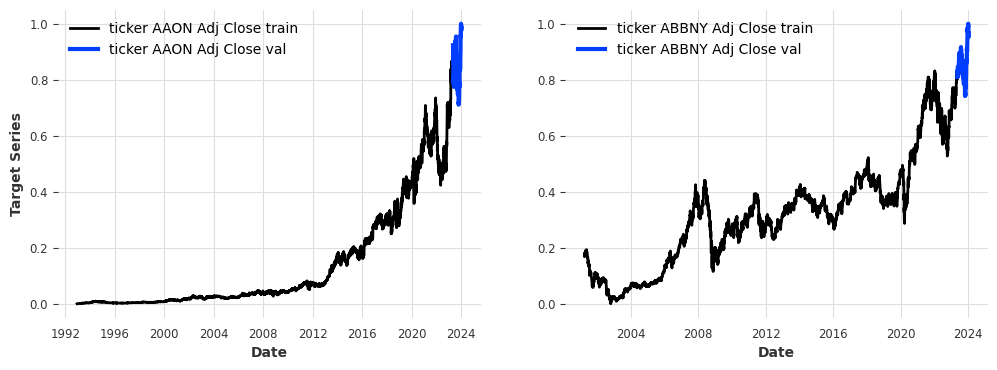

In [139]:
import matplotlib.pyplot as plt

# plot sample of target series
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
for i,t in enumerate(target_series.keys()):
    train_series[t].plot(label=f'ticker {t} {train_series[t].columns[0]} train', ax=axes[i])
    val_series[t].plot(label=f'ticker {t} {train_series[t].columns[0]} val', lw=3, ax=axes[i])

axes[0].set_ylabel('Target Series')


Show seasonalities

Text(0, 0.5, 'Seasonality')

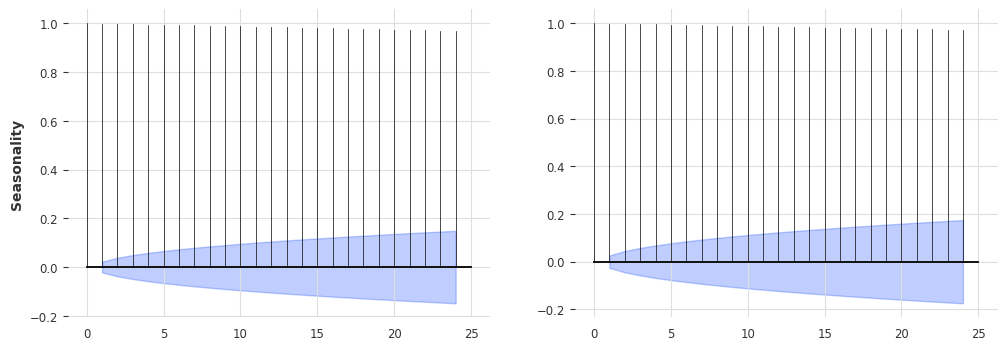

In [142]:
from darts.utils.statistics import plot_acf, check_seasonality

# plot sample of target series
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
for i,t in enumerate(target_series.keys()):
    plot_acf(train_series[t], alpha=0.05, axis=axes[i])

axes[0].set_ylabel('Seasonality')



Train our current working model

Prepare Encoders that Darts will automatically use for training and inference

In [143]:
from darts.dataprocessing.transformers import Scaler, MissingValuesFiller
from darts.dataprocessing import Pipeline
# 
scaler = Scaler(verbose=True, n_jobs=-1)

# darts encoder examples: https://unit8co.github.io/darts/generated_api/darts.dataprocessing.encoders.encoders.html#
encoders = {
    'cyclic': {'future': ['dayofweek', 'month', 'quarter']},
    "datetime_attribute": {"future": ["dayofweek", "month", "quarter", "year"]}, 
    'position': {'past': ['relative'], 'future': ['relative']},
    "transformer": scaler
}



In [144]:
train_history = 252*2 # 252 days in a year with market data
pred_horizon = 21*2 # 21 days in a month with market data
n_epochs = 10 # model training epochs

Model hyperparameter selection

In [147]:
# based on Darts template: https://unit8co.github.io/darts/examples/18-TiDE-examples.html#Model-Parameter-Setup

optimizer_kwargs = {
    "lr": 1e-3,
}

# PyTorch Lightning Trainer arguments
pl_trainer_kwargs = {
    "gradient_clip_val": 1,
    "max_epochs": 200,
    "accelerator": "auto",
    "callbacks": [],
}

# learning rate scheduler
lr_scheduler_cls = torch.optim.lr_scheduler.ExponentialLR
lr_scheduler_kwargs = {
    "gamma": 0.999,
}

# early stopping (needs to be reset for each model later on)
# this setting stops training once the the validation loss has not decreased by more than 1e-3 for 10 epochs
early_stopping_args = {
    "monitor": "val_loss",
    "patience": 10,
    "min_delta": 1e-3,
    "mode": "min",
}

#
common_model_args = {
    # "input_chunk_length": 12,  # lookback window
    # "output_chunk_length": 12,  # forecast/lookahead window
    "optimizer_kwargs": optimizer_kwargs,
    "pl_trainer_kwargs": pl_trainer_kwargs,
    "lr_scheduler_cls": lr_scheduler_cls,
    "lr_scheduler_kwargs": lr_scheduler_kwargs,
    # "likelihood": None,  # use a likelihood for probabilistic forecasts
    # "save_checkpoints": True,  # checkpoint to retrieve the best performing model state,
    # "force_reset": True,
    "batch_size": 256,
    "random_state": 42,
}

In [148]:
from darts.models import TiDEModel

from darts.utils.likelihood_models import QuantileRegression

saved_model_name = 'data/canswim_model.pt'
model = None

# If available, load the saved model state that performed best on validation set
try:
  print('Loading saved model')
  model = TiDEModel.load(saved_model_name)  
except Exception as e:
  print('Error loading saved model:', e)
  print('Creating a new model')
  model = TiDEModel(
      **common_model_args,
      input_chunk_length=train_history,
      output_chunk_length=pred_horizon,
      add_encoders=encoders,
      dropout=0.1,
      n_epochs=n_epochs,
      use_reversible_instance_norm=True,
      likelihood=QuantileRegression(quantiles=[0.01, 0.05, 0.2, 0.5, 0.8, 0.95, 0.99]),
      model_name=saved_model_name,
  )
  


Loading saved model
Error loading saved model: [Errno 2] No such file or directory: 'data/canswim_model.pt'
Creating a new model


In [ ]:
from darts.models import RegressionModel
from darts.models.forecasting.forecasting_model import GlobalForecastingModel

# when True, multiple time series are supported
supports_multi_ts = issubclass(model.__class__, GlobalForecastingModel)
supports_multi_ts

In [155]:
target_train_list = [series for ticker, series in sorted(train_series.items())]
print(len(target_train_list))
past_cov_list = [series for ticker, series in sorted(past_covariates_train.items())]
print(len(past_cov_list))
future_cov_list = [series for ticker, series in sorted(future_covariates.items())]
print(len(future_cov_list))


2
2
2


In [164]:
# train model
# for i in range(100):
model.fit(target_train_list[0], epochs=n_epochs, past_covariates=past_cov_list[0], future_covariates=future_cov_list[0], num_loader_workers=10) # 



Fitting (Scaler):   0%|          | 0/1 [00:00<?, ?it/s]

Transform (Scaler):   0%|          | 0/1 [00:00<?, ?it/s]

Fitting (Scaler):   0%|          | 0/1 [00:00<?, ?it/s]

Transform (Scaler):   0%|          | 0/1 [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 6.1 K 
5 | future_cov_projection | _ResidualBlock   | 2.2 K 
6 | encoders              | Sequential       | 1.2 M 
7 | decoders              | Sequential       | 1.2 M 
8 | temporal_decoder      | _ResidualBlock   | 4.8 K 
9 | lookback_skip         | Linear           | 148 K 
-----------------------------------------------------------
2.6 M     Trainable params
0         Non-trainable params
2.6 M     Total params
10.451    Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

/home/ivelin/anaconda3/envs/canswim/lib/python3.11/site-packages/pytorch_lightning/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...


TiDEModel(num_encoder_layers=1, num_decoder_layers=1, decoder_output_dim=16, hidden_size=128, temporal_width_past=4, temporal_width_future=4, temporal_decoder_hidden=32, use_layer_norm=False, dropout=0.1, use_static_covariates=True, optimizer_kwargs={'lr': 0.001}, pl_trainer_kwargs={'gradient_clip_val': 1, 'max_epochs': 200, 'accelerator': 'auto', 'callbacks': []}, lr_scheduler_cls=<class 'torch.optim.lr_scheduler.ExponentialLR'>, lr_scheduler_kwargs={'gamma': 0.999}, batch_size=256, random_state=42, input_chunk_length=504, output_chunk_length=42, add_encoders={'cyclic': {'future': ['dayofweek', 'month', 'quarter']}, 'datetime_attribute': {'future': ['dayofweek', 'month', 'quarter', 'year']}, 'position': {'past': ['relative'], 'future': ['relative']}, 'transformer': Scaler}, n_epochs=100, use_reversible_instance_norm=True, likelihood=QuantileRegression(quantiles: Optional[List[float]] = None), model_name=data/canswim_model.pt)

In [165]:
# save model checkpoint
model.save(saved_model_name)


In [166]:
# use probabilistic prediction
# see https://unit8co.github.io/darts/userguide/forecasting_overview.html#probabilistic-forecasts
pred = model.predict(pred_horizon, series=target_train_list, past_covariates=past_cov_list, future_covariates=future_cov_list, mc_dropout=True, num_samples=500) #   len(val)) 

Transform (Scaler):   0%|          | 0/1 [00:00<?, ?it/s]

Transform (Scaler):   0%|          | 0/1 [00:00<?, ?it/s]

Transform (Scaler):   0%|          | 0/1 [00:00<?, ?it/s]

Transform (Scaler):   0%|          | 0/1 [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

In [167]:
pred[0]

<TimeSeries (DataArray) (Date: 42, component: 1, sample: 500)>
array([[[nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * Date       (Date) datetime64[ns] 2023-05-05 2023-05-08 ... 2023-07-03
  * component  (component) object 'Adj Close'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [162]:
pred2_series = target.slice(target.start_time(), val_start+pd.Timedelta(days=60))
pred2 = model.predict(pred_horizon, series=pred2_series, past_covariates=past_covariates, future_covariates=future_covariates, mc_dropout=True, num_samples=500) #   len(val)) 
pred2

AttributeError: 'str' object has no attribute 'components'

In [ ]:
pred3_series = target.slice(target.start_time(), pred2_series.end_time()+pd.Timedelta(days=60))
pred3 = model.predict(pred_horizon, series=pred3_series, past_covariates=past_covariates, future_covariates=future_covariates, mc_dropout=True, num_samples=500) #   len(val)) 
pred3

In [ ]:
pred4_series = target.slice(target.start_time(), pred3_series.end_time()+pd.Timedelta(days=60))
pred4 = model.predict(pred_horizon, series=pred4_series, past_covariates=past_covariates, future_covariates=future_covariates, mc_dropout=True, num_samples=500) #   len(val)) 
pred4

In [ ]:
pred5_series = target.slice(target.start_time(), val_start+pd.Timedelta(days=30))
pred5 = model.predict(pred_horizon, series=pred5_series, past_covariates=past_covariates, future_covariates=future_covariates, mc_dropout=True, num_samples=500) #   len(val)) 
pred5

In [ ]:
# select a reasonable range of train and val data points for convenient visualization of results
actual = target.slice(val_start-pd.Timedelta(days=train_history), target.end_time())
ax = actual.plot(label='actual')
pred.plot(label=f'forecast {val_start} + {pred_horizon}', lw=3)
pred2.plot(label=f'forecast {pred2_series.end_time()} + {pred_horizon}')
pred3.plot(label=f'forecast {pred3_series.end_time()} + {pred_horizon}')
pred4.plot(label=f'forecast {pred4_series.end_time()} + {pred_horizon}')
pred5.plot(label=f'forecast {pred5_series.end_time()} + {pred_horizon}')
plt.legend()

# Major ticks every half year, minor ticks every month,
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(13)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)
ax.set_ylabel(r'Price [scaled 0-1]')


Backtest Model


Backtest model on the full range of test data

In [ ]:
from darts.metrics import rmse

def eval_model(model=None, series=None, start=None, past_covariates=None, future_covariates=None, forecast_horizon=None):
    # Past and future covariates are optional because they won't always be used in our tests
    
    # We backtest the model on the last 20% of the flow series, with a horizon of 10 steps:
    backtest = model.historical_forecasts(series=series, 
                                          past_covariates=past_covariates,
                                          future_covariates=future_covariates,
                                          start=start, 
                                          retrain=False,
                                          verbose=True, 
                                          forecast_horizon=forecast_horizon,
                                          num_samples=500, # probabilistic forecasting
                                          predict_kwargs={'mc_dropout': True, 'num_loader_workers': 10, 'n_jobs': -1}
                                          )
    
    return backtest


In [ ]:
# set the forecast start at a time before the validation date in order to see 
# the difference between predicting on training vs validation data
# predicting up to the validate date should be near match to actuals
# whereas predicting on unseen validate data should have room for improvement
forecast_start = val_start-pd.Timedelta(days=60)
forecast_horizon = pred_horizon # pred_horizon
backtest = eval_model(model=model, series=target, start=forecast_start, forecast_horizon=forecast_horizon, past_covariates=past_covariates, future_covariates=future_covariates)


In [ ]:
import matplotlib.dates as mdates

# plot results
ax = actual.plot(label='actual')
backtest.plot(label=f'backtest (forecast_horizon={forecast_horizon})')
print('Backtest RMSE = {}'.format(rmse(target, backtest)))

# Major ticks every half year, minor ticks every month,
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(13)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)
ax.set_ylabel(r'Price [scaled 0-1]')
